# Table of Contents
 <p>

In [1]:
%matplotlib inline

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
os.chdir("/home/3928941380/Desktop/Files/C_Practice/")

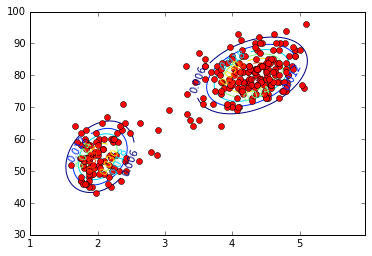

In [4]:
def gaussian_2d(x, y, x0, y0, a, b, c, d):
    return np.exp(-0.5*((x-x0)*((x-x0)*d-(y-y0)*b)+(y-y0)*(-(x-x0)*b+(y-y0)*a))/(a*d-b*c))/6.28/math.sqrt(a*d-b*c)

# X, Yのrangeを決めている
delta = 0.025
x = np.arange(1.0, 6.0, delta)
y = np.arange(30.0, 100.0, delta)
X, Y = np.meshgrid(x, y)

# ここの数字はloopの最終回
    # X, Y, mu, sigmaの順
Z1 = gaussian_2d(X, Y, 4.28966, 79.9681, 0.169968,  0.940609, 0.940609, 36.0462)
Z2 = gaussian_2d(X, Y, 2.03639, 54.4785, 0.0691677, 0.435168, 0.435168, 33.6973)
# piで混合する
Z = 0.644127*Z1 + 0.355873*Z2


plt.clf()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)

fp = open("faithful.txt")
data_x = []
data_y = []
for row in fp:
    data_x.append(float((row.split()[0])))
    data_y.append(float((row.split()[1])))
fp.close()
plt.plot(data_x, data_y, "ro")

plt.show()

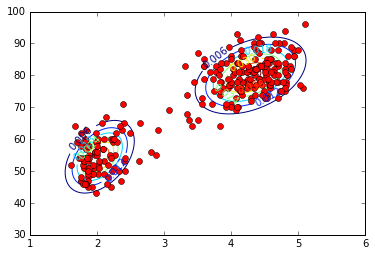

In [5]:
import matplotlib.mlab as mlab

mean = [4.28966, 79.9681]
cov = [[0.169968,  0.940609], [0.940609, 36.0462]]

pi_k = np.array([0.644127, 0.355873])
x = np.linspace(1.0, 6.0, 300)
y = np.linspace(30, 100, 300)
X, Y = np.meshgrid(x,y)

# 分散共分散行列の対角要素はsigmax^2, sigmay^2 であることに注意してbivariate normalを作る
Z1 = mlab.bivariate_normal(X, Y, sigmax=np.sqrt(0.169968), sigmay=np.sqrt(36.0462), mux=4.28966, muy=79.9681, sigmaxy=np.sqrt(0.940609))
Z2 = mlab.bivariate_normal(X, Y, sigmax=np.sqrt(0.0691677), sigmay=np.sqrt(33.6973), mux=2.03639, muy=54.4785, sigmaxy=np.sqrt(0.435168))
Z = pi_k[0] * Z1 + pi_k[1] * Z2

CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)

fp = open("faithful.txt")
data_x = []
data_y = []
for row in fp:
    data_x.append(float((row.split()[0])))
    data_y.append(float((row.split()[1])))
fp.close()
plt.plot(data_x, data_y, "ro")

plt.show()